In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

df['Total Cases'] = df[['Confirmed','Recovered','Deaths']].sum(axis=1)

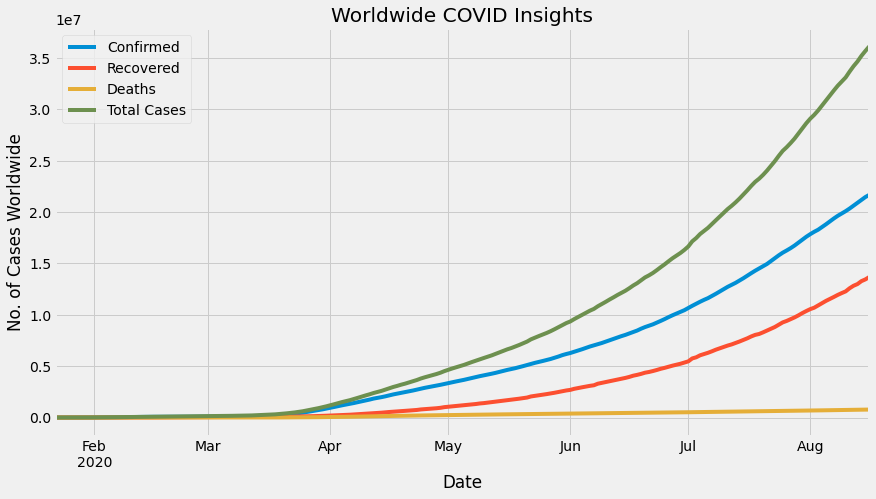

In [4]:
worldwide_df = df.groupby(['Date']).sum()

w = worldwide_df.plot(figsize=(13,7))
w.set_xlabel('Date')
w.set_ylabel('No. of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')
plt.show()

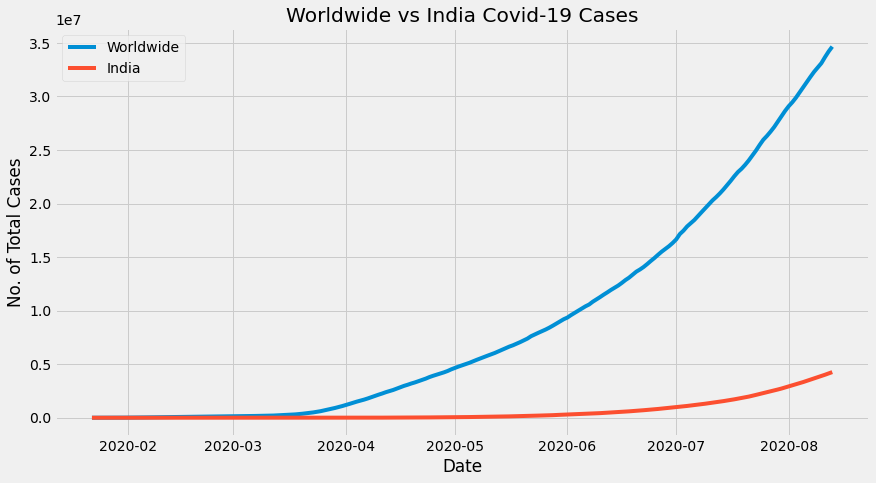

In [12]:
in_df = df[df['Country']=='India'].groupby(['Date']).sum()

fig = plt.figure(figsize = (13,7))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label = 'Worldwide')
ax.plot(in_df[['Total Cases']], label='India')
ax.set_xlabel('Date')
ax.set_ylabel('No. of Total Cases')
ax.title.set_text('Worldwide vs India Covid-19 Cases')
plt.legend(loc = 'upper left')
plt.show()

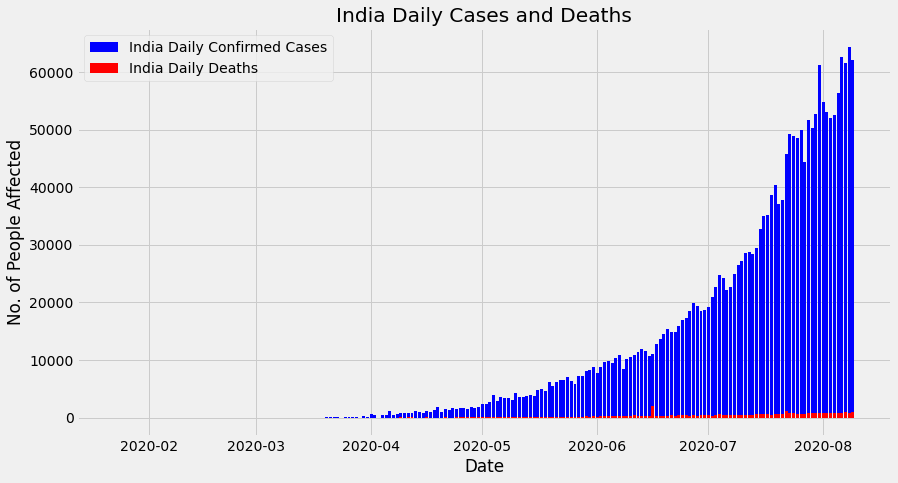

In [21]:
# India Daily Cases and Deaths

in_df['Daily Confirmed'] = in_df['Confirmed'].sub(in_df['Confirmed'].shift())
in_df['Daily Deaths'] = in_df['Deaths'].sub(in_df['Deaths'].shift())

fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)

ax.bar(in_df['Date'],in_df['Daily Confirmed'], color='b',label='India Daily Confirmed Cases')
ax.bar(in_df['Date'],in_df['Daily Deaths'], color='r',label='India Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('No. of People Affected')
ax.title.set_text('India Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

# Comparison Between The Worst Affected Countries:

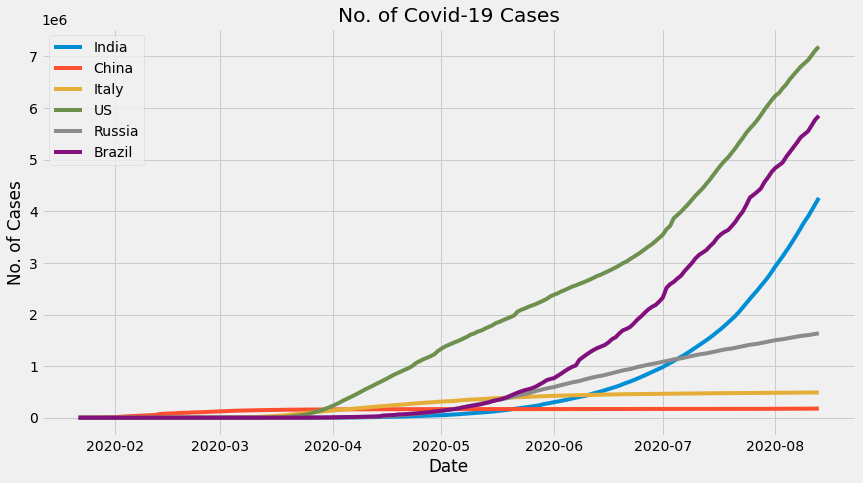

In [25]:
ch_df = df[df['Country']=='China'].groupby(['Date']).sum()
it_df = df[df['Country']=='Italy'].groupby(['Date']).sum()
us_df = df[df['Country']=='US'].groupby(['Date']).sum()
rs_df = df[df['Country']=='Russia'].groupby(['Date']).sum()
br_df = df[df['Country']=='Brazil'].groupby(['Date']).sum()

plt.figure(figsize =(13,7))
plt.plot(in_df[['Total Cases']], label='India')
plt.plot(ch_df[['Total Cases']], label='China')
plt.plot(it_df[['Total Cases']], label='Italy')
plt.plot(us_df[['Total Cases']], label='US')
plt.plot(rs_df[['Total Cases']], label='Russia')
plt.plot(br_df[['Total Cases']], label='Brazil')


plt.title('No. of Covid-19 Cases')
plt.xlabel('Date')
plt.ylabel('No. of Cases')
plt.legend(loc = 'upper left')

plt.show()

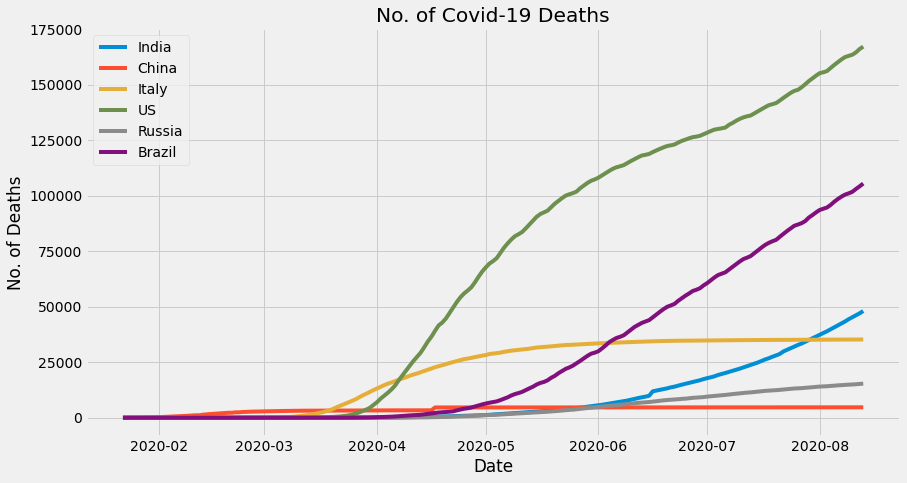

In [26]:
# Deaths Comparison

plt.figure(figsize =(13,7))
plt.plot(in_df[['Deaths']], label='India')
plt.plot(ch_df[['Deaths']], label='China')
plt.plot(it_df[['Deaths']], label='Italy')
plt.plot(us_df[['Deaths']], label='US')
plt.plot(rs_df[['Deaths']], label='Russia')
plt.plot(br_df[['Deaths']], label='Brazil')


plt.title('No. of Covid-19 Deaths')
plt.xlabel('Date')
plt.ylabel('No. of Deaths')
plt.legend(loc = 'upper left')

plt.show()